## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt     
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

## Data Preprocessing

In [2]:
df = pd.read_csv('crop_production.csv')
df = df.drop(['State_Name'], axis=1)
# df = df.drop(['District'], axis=1)
df = df.drop(['Crop_Year'], axis=1)
df

,District_Name,Season,Crop,Area,Production
0,NICOBARS,Kharif,Arecanut,1254.0,2000.0
1,NICOBARS,Kharif,Other Kharif pulses,2.0,1.0
2,NICOBARS,Kharif,Rice,102.0,321.0
3,NICOBARS,Whole Year,Banana,176.0,641.0
4,NICOBARS,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...
246086,PURULIA,Summer,Rice,306.0,801.0
246087,PURULIA,Summer,Sesamum,627.0,463.0
246088,PURULIA,Whole Year,Sugarcane,324.0,16250.0
246089,PURULIA,Winter,Rice,279151.0,597899.0


In [4]:
crop_name = df['Crop'].unique()

In [5]:
main_crop = []
for crop in crop_name:
    if len(df[df['Crop'] == crop]) > 5000:
        main_crop.append(crop)
        print(crop, len(df[df['Crop'] == crop]))

Rice 15104
Sugarcane 7921
Dry chillies 6489
Maize 13947
Moong(Green Gram) 10318
Urad 9850
Arhar/Tur 7578
Groundnut 8834
Sunflower 5571
Bajra 5427
Jowar 7065
Gram 7361
Wheat 7899
Sesamum 9046
Onion 7012
Potato 6931
Rapeseed &Mustard 7592


In [6]:
df.shape

(246091, 5)

In [7]:
crop_data = pd.DataFrame()
for crop in main_crop:
    index = df[df.Crop == crop].index
    for i in index:
        crop_data = pd.concat([crop_data, df.loc[[i]]])  # Use pd.concat instead of append
    print(crop)

Rice
Sugarcane
Dry chillies
Maize
Moong(Green Gram)
Urad
Arhar/Tur
Groundnut
Sunflower
Bajra
Jowar
Gram
Wheat
Sesamum
Onion
Potato
Rapeseed &Mustard


In [52]:
crop_data = crop_data.reset_index()
crop_data['Crop'].unique()

array(['Rice', 'Sugarcane', 'Dry chillies', 'Maize', 'Moong(Green Gram)',
       'Urad', 'Arhar/Tur', 'Groundnut', 'Sunflower', 'Bajra', 'Jowar',
       'Gram', 'Wheat', 'Sesamum', 'Onion', 'Potato', 'Rapeseed &Mustard'],
      dtype=object)

In [8]:
from sklearn.utils import shuffle

In [9]:
import os
a=os.getcwd()
a

'c:\\Users\\kp18f\\Downloads\\Phone Link\\classification results'

In [10]:
# loading datasets
df_train = pd.read_csv("CropTrainFinal.csv")
df_test = pd.read_csv("CropTestFinal.csv")
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [11]:
df_t = df_train[:10000]


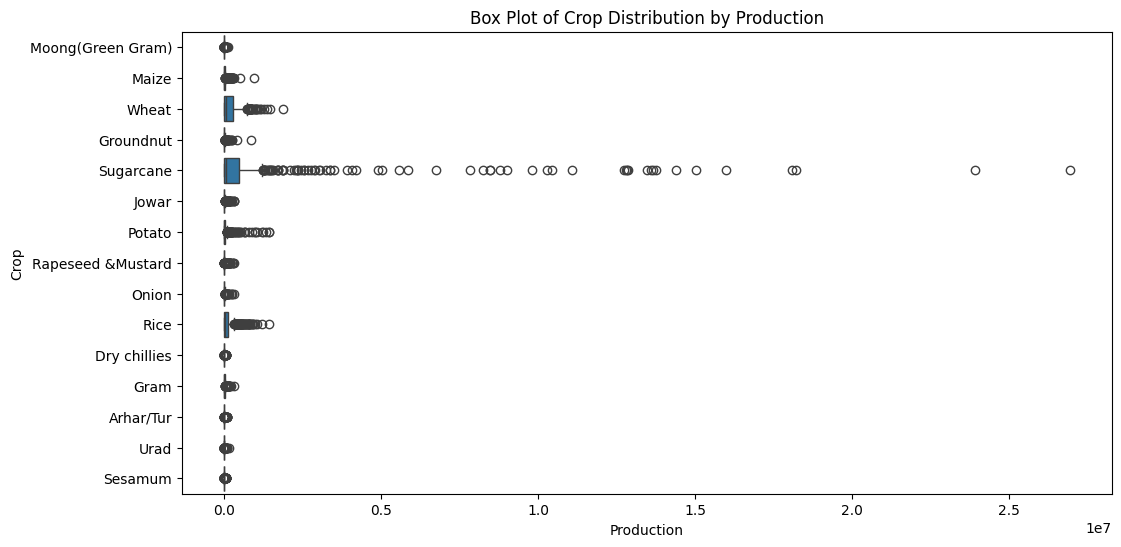

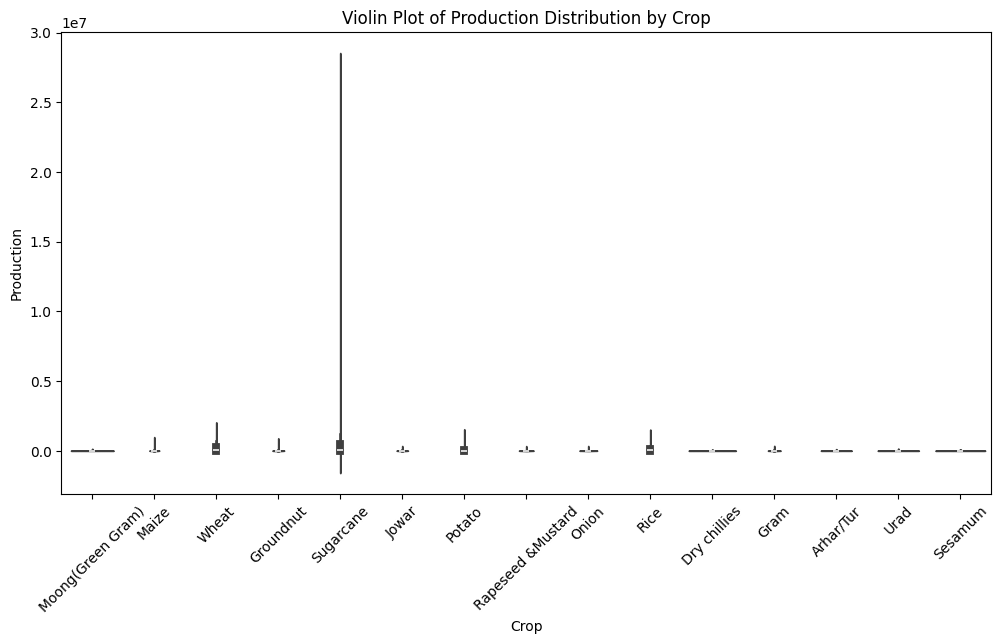

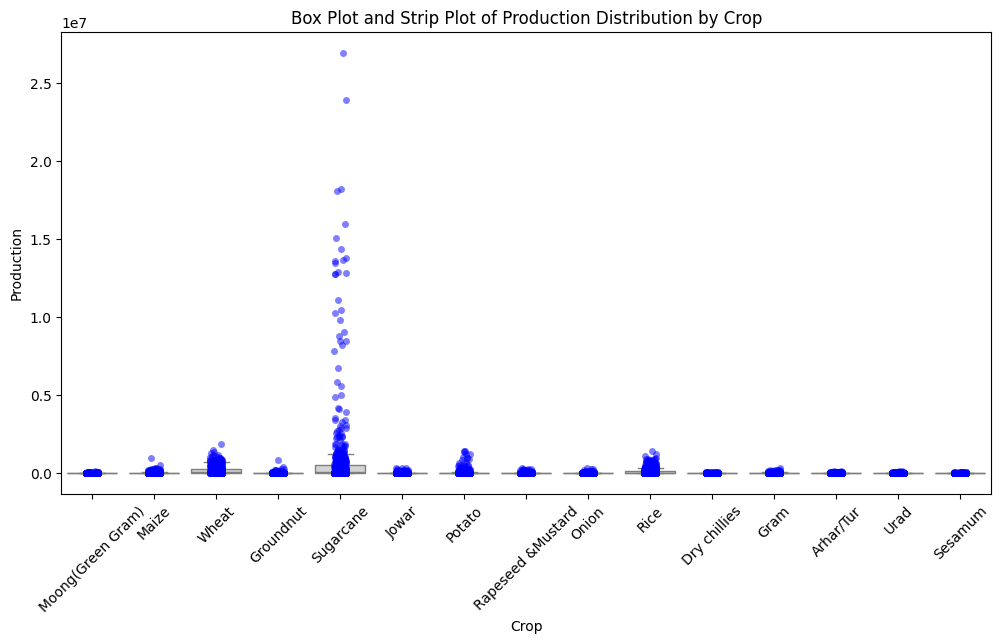

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot for Production vs Crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='Production', y='Crop', data=df_t)
plt.xlabel('Production')  # Label for the x-axis
plt.ylabel('Crop')        # Label for the y-axis
plt.title('Box Plot of Crop Distribution by Production')  # Title for the plot
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plot for Production vs Crop
plt.figure(figsize=(12, 6))
sns.violinplot(x='Crop', y='Production', data=df_t)
plt.xlabel('Crop')         # Label for the x-axis
plt.ylabel('Production')   # Label for the y-axis
plt.title('Violin Plot of Production Distribution by Crop')  # Title for the plot
plt.xticks(rotation=45)    # Rotate x-axis labels for better readability
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Combined Box Plot and Strip Plot for Production vs Crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Production', data=df_t, color='lightgray', fliersize=0)  # Box plot without outliers
sns.stripplot(x='Crop', y='Production', data=df_t, color='blue', alpha=0.5, jitter=True)  # Strip plot
plt.xlabel('Crop')         # Label for the x-axis
plt.ylabel('Production')   # Label for the y-axis
plt.title('Box Plot and Strip Plot of Production Distribution by Crop')  # Title for the plot
plt.xticks(rotation=45)    # Rotate x-axis labels for better readability
plt.show()

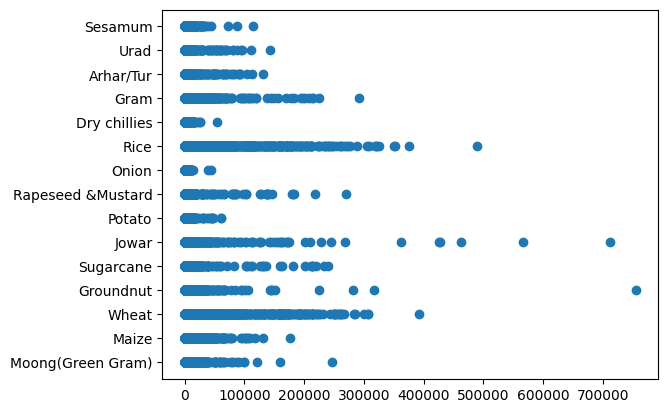

In [13]:
import matplotlib.pyplot as plt
x1 = df_t['Area']
y1 = df_t['Crop']
plt.scatter(x1, y1)
plt.show()

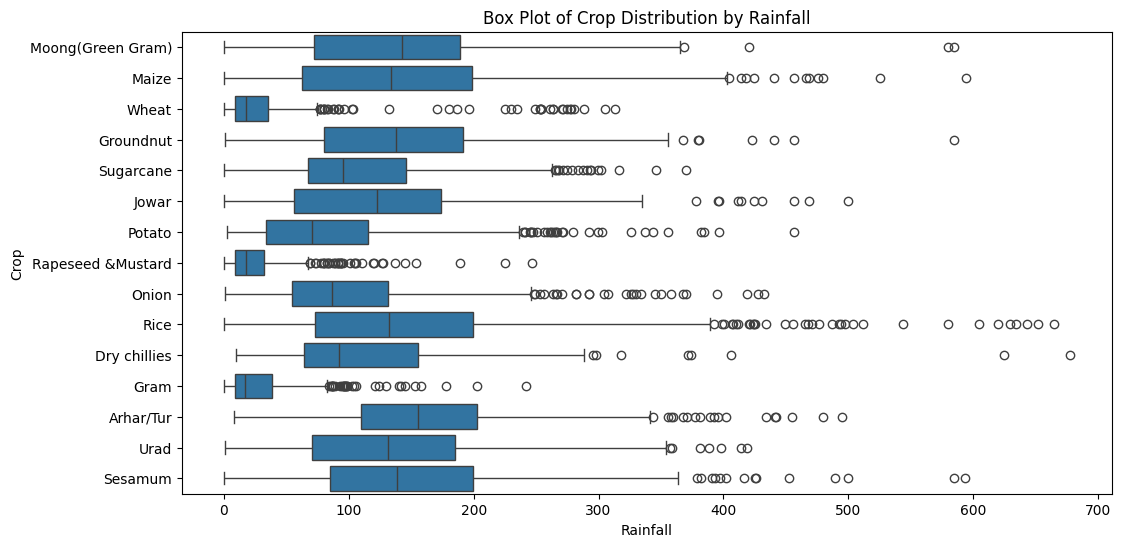

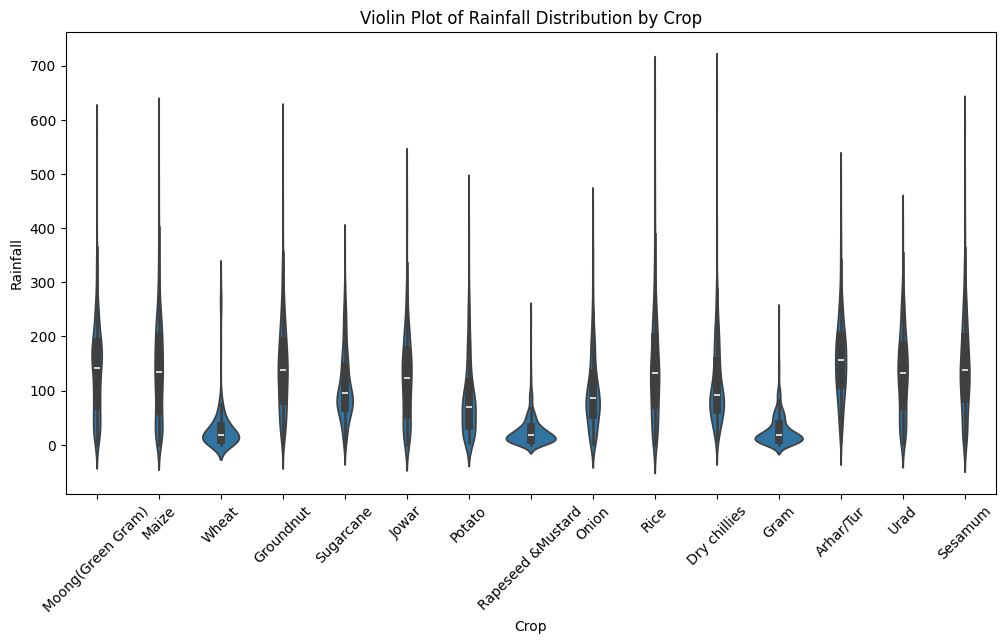

In [14]:
import seaborn as sns

# Box Plot for Rainfall vs Crop
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rainfall', y='Crop', data=df_t)
plt.xlabel('Rainfall')  # Label for the x-axis
plt.ylabel('Crop')      # Label for the y-axis
plt.title('Box Plot of Crop Distribution by Rainfall')  # Title for the plot
plt.show()

# Violin Plot for Rainfall vs Crop
plt.figure(figsize=(12, 6))
sns.violinplot(x='Crop', y='Rainfall', data=df_t)
plt.xlabel('Crop')       # Label for the x-axis
plt.ylabel('Rainfall')   # Label for the y-axis
plt.title('Violin Plot of Rainfall Distribution by Crop')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

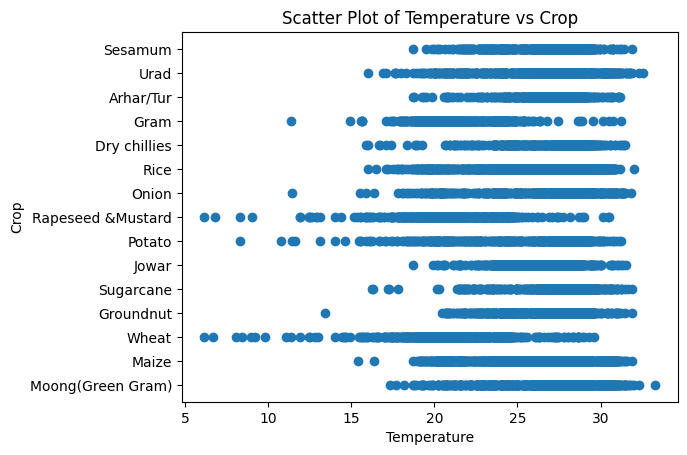

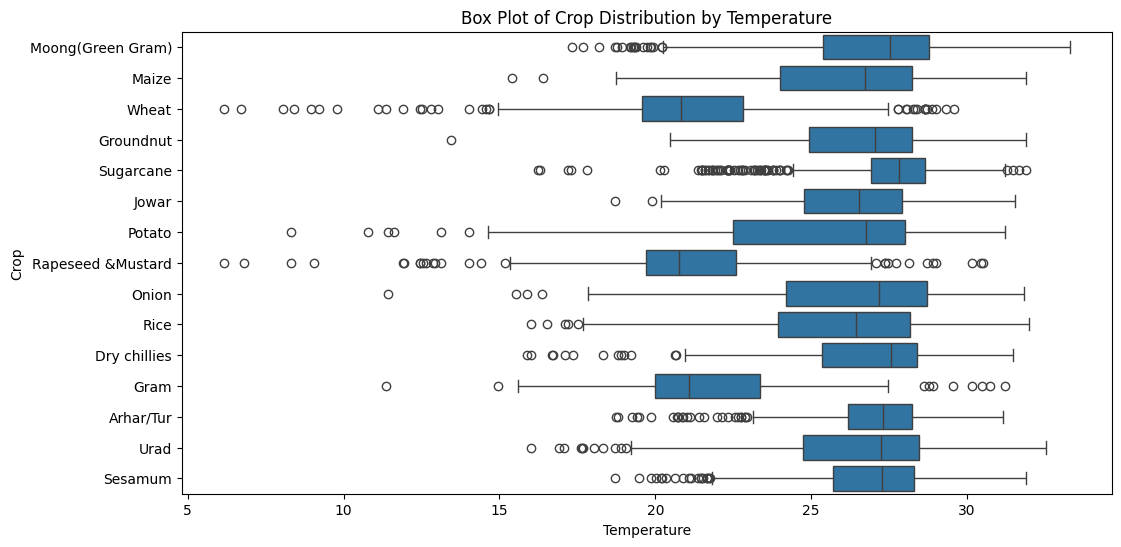

In [15]:
import matplotlib.pyplot as plt
x1 = df_t['Temperature']
y1 = df_t['Crop']
plt.scatter(x1, y1)
plt.xlabel('Temperature')  # Label for the x-axis
plt.ylabel('Crop')         # Label for the y-axis
plt.title('Scatter Plot of Temperature vs Crop')  # Optional: Title for the plot
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Temperature', y='Crop', data=df_t)
plt.xlabel('Temperature')  # Label for the x-axis
plt.ylabel('Crop')         # Label for the y-axis
plt.title('Box Plot of Crop Distribution by Temperature')  # Title for the plot
plt.show()

In [16]:
y_ = pd.DataFrame()
y_['Crop'] = df_train['Crop']
#df_train = df_train.drop(['Crop'], axis=1)

In [17]:
cr = LabelEncoder()
se = LabelEncoder()
df_train['Season'] = se.fit_transform(df_train['Season'])
y_['Crop'] = cr.fit_transform(y_['Crop'])

In [18]:
x_train = np.array(df_train)
y_train = np.array(y_)

In [19]:
y_ts = pd.DataFrame()
y_ts['Crop'] = df_test['Crop']
#df_test = df_test.drop(['Crop'], axis=1)

In [20]:
df_test['Season'] = se.transform(df_test['Season'])
y_ts['Crop'] = cr.transform(y_ts['Crop'])

In [21]:
x_test = np.array(df_test)
y_test = np.array(y_ts)

In [22]:
df_train.tail(15)

,Area,Production,Rainfall,Season,Temperature,Crop
85210,77734.0,112092.0,2.434750,2,20.326500,Rapeseed &Mustard
85211,2004.0,1900.0,72.284000,2,23.890750,Urad
85212,6059.0,12652.0,394.930000,3,25.192500,Rice
85213,592.0,1455.0,151.060667,1,28.058333,Arhar/Tur
85214,37051.0,48897.0,247.116333,1,25.588333,Maize
85215,54.0,7.0,287.165667,1,24.892333,Urad
85216,180.0,45.0,46.165500,2,24.072500,Moong(Green Gram)
85217,16.0,97.4,7.253000,5,22.563250,Potato
85218,959.0,13821.0,101.158667,1,28.537333,Onion
85219,300.0,200.0,1.174000,2,23.646500,Jowar


In [23]:
df_test.head(15)

,Area,Production,Rainfall,Season,Temperature,Crop
0,28625.0,1784483.0,143.636000,1,28.299667,Sugarcane
1,138347.0,258707.0,8.579000,2,20.535500,Wheat
2,610.0,3547.0,56.610000,2,23.534750,Onion
3,200.0,300.0,223.255500,3,30.272250,Maize
4,33000.0,23100.0,127.565667,1,26.343000,Moong(Green Gram)
5,7700.0,3500.0,71.837000,1,29.354333,Urad
6,7425.0,3438.0,159.932333,1,28.107333,Arhar/Tur
7,4842.0,4019.0,132.896000,1,28.846667,Arhar/Tur
8,842.0,1880.0,127.488000,3,26.284500,Maize
9,4500.0,700.0,139.045333,1,26.061000,Sesamum


In [24]:
y_['Crop'].unique()

array([ 6,  5, 14,  3, 12,  4,  8,  9,  7, 10,  1,  2,  0, 13, 11])

In [38]:
#df_train = df_train.drop(['District_Name'], axis=1)

In [26]:
season = LabelEncoder()
crop = LabelEncoder()
df_train['Season'] = season.fit_transform(df_train['Season'])
y_['Crop'] = crop.fit_transform(y_['Crop'])

In [27]:
y = pd.DataFrame()
y['Crop'] = df_train['Crop']
df_ = df_train
#df_train = df_train.drop(['Crop'], axis=1)
x = df_train

In [28]:
# filling nan values in production
prod = x['Production']
prod = pd.DataFrame(prod)
prod = prod.fillna(prod.mean())
prod.isnull().values.any()

False

In [29]:
# filling back values to dataframe
x['Production'] = prod
np.isnan(x['Production']).sum()

0

In [30]:
df_ = x

In [31]:
df_['crop'] = y['Crop']

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((85225, 6), (85225, 1), (21307, 6), (21307, 1))

In [33]:
# ... existing code ...
# Assuming x_train and y_train are already defined
x_train_k = x_train.copy()  # Create a copy of x_train
y_train_k = y_train.copy()  # Create a copy of y_train
x_test_k = x_test.copy()     # Create a copy of x_test
y_test_k = y_test.copy()     # Create a copy of y_test

# Now you can access their shapes
x_train_k.shape, y_train_k.shape, x_test_k.shape, y_test_k.shape
# ... existing code ...

((85225, 6), (85225, 1), (21307, 6), (21307, 1))

In [34]:

# ... existing code ...
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Check the original DataFrame before any processing
print("Original df_train shape:", df_train.shape)
print("Original df_train columns:", df_train.columns)
print("Original df_train contents:\n", df_train.head())

# Define the LabelEncoder for categorical columns
season = LabelEncoder()
crop = LabelEncoder()

# Check if 'Crop' exists before trying to encode it
if 'Crop' in df_train.columns:
    df_train['Crop'] = crop.fit_transform(df_train['Crop'])  # Encode 'Crop'
else:
    raise KeyError("'Crop' column not found in df_train. Please check the DataFrame.")

# Encode 'Season' if it exists
if 'Season' in df_train.columns:
    df_train['Season'] = season.fit_transform(df_train['Season'])

# Split the data into features and target
y = df_train['Crop']  # Assuming 'Crop' is the target variable
x = df_train.drop(['Crop'], axis=1)  # Drop 'Crop' from features

# Debugging: Check the shapes and contents of x and y
print("x shape:", x.shape)
print("y shape:", y.shape)
print("x contents:\n", x.head())
print("y contents:\n", y.head())

# Ensure that x_train and x_test are defined as DataFrames
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Debugging: Check the shapes and contents of x_train and x_test
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("x_train contents:\n", x_train.head())
print("x_test contents:\n", x_test.head())

# Now, keep only numerical columns
x_train = x_train.select_dtypes(include=[np.number])  # Keep only numerical columns
x_test = x_test.select_dtypes(include=[np.number])    # Keep only numerical columns

# Check if x_train and x_test are empty
if x_train.empty or x_test.empty:
    raise ValueError("x_train or x_test is empty. Please check the data preprocessing steps.")

# Now you can scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Fit and transform on training data
x_test = scaler.transform(x_test)  # Transform on test data

# If you need to keep x_train_k and x_test_k as DataFrames, do it before scaling
x_train_k = pd.DataFrame(x_train)  # Convert to DataFrame if necessary
x_test_k = pd.DataFrame(x_test)    # Convert to DataFrame if necessary

# Scale the copies if needed
x_train_k = scaler.fit_transform(x_train_k)  # Scale the copy if needed
x_test_k = scaler.transform(x_test_k)  # Scale the copy if needed
# ... existing code ...

Original df_train shape: (85225, 7)
Original df_train columns: Index(['Area', 'Production', 'Rainfall', 'Season', 'Temperature', 'Crop',
       'crop'],
      dtype='object')
Original df_train contents:
       Area  Production    Rainfall  Season  Temperature               Crop  \
0   7800.0      3200.0   30.400333       1    28.007000  Moong(Green Gram)   
1  39922.0     75572.0  111.901000       1    27.232333              Maize   
2  44656.0     49099.0    3.396500       2    20.277000              Wheat   
3   6540.0      3945.0   30.932500       2    24.241500              Wheat   
4   2911.0      2062.0  189.208333       1    27.456333              Maize   

                crop  
0  Moong(Green Gram)  
1              Maize  
2              Wheat  
3              Wheat  
4              Maize  
x shape: (85225, 6)
y shape: (85225,)
x contents:
       Area  Production    Rainfall  Season  Temperature               crop
0   7800.0      3200.0   30.400333       1    28.007000  Moong(

## Ploting Confusion Matrix

In [37]:
import numpy as np


def plot_confusion_matrix(cm,
                        target_names,
                        title='Confusion matrix',
                        cmap=None,
                        normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
y_pred1 = clf1.predict(x_test)

In [40]:
clf1.score(x_test, y_test)

0.5522440598415957

In [41]:
y_pred1[:15]

array([10,  7, 14,  8, 11,  5,  5,  0,  2,  6, 11,  7,  1, 10,  5])

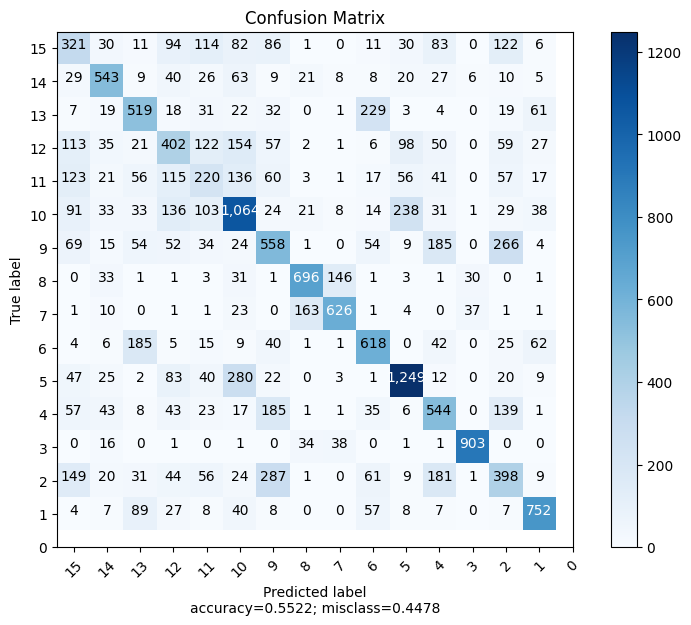

In [42]:
mat1 = confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm           = mat1, 
                    normalize    = False,
                    target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                    title        = "Confusion Matrix")

## SGDClassifier

In [52]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred2 = sgd.predict(x_test)
sgd.score(x_test, y_test)

0.21085362276327368

In [ ]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(x_train, y_train)
# clf.score(x_test, y_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors = 24)
clf2.fit(x_train, y_train)
y_pred3 = clf2.predict(x_test)
clf2.score(x_test, y_test)

0.30912290994426517

In [54]:
y_test.shape

(17045,)

In [55]:
import matplotlib.pyplot as plt
import numpy as np

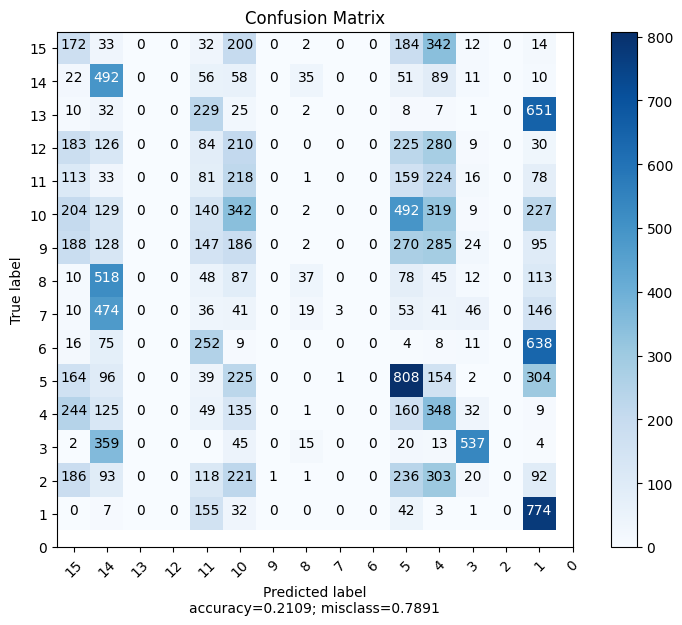

In [56]:
mat3 = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm           = mat3, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

clf6 = XGBClassifier(max_depth=7, eta = 0.2, gamma = 3, nrounds = 40)

clf6.fit(x_train, y_train)
y_pred4 = clf6.predict(x_test)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\kp18f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "nrounds" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 53.18%


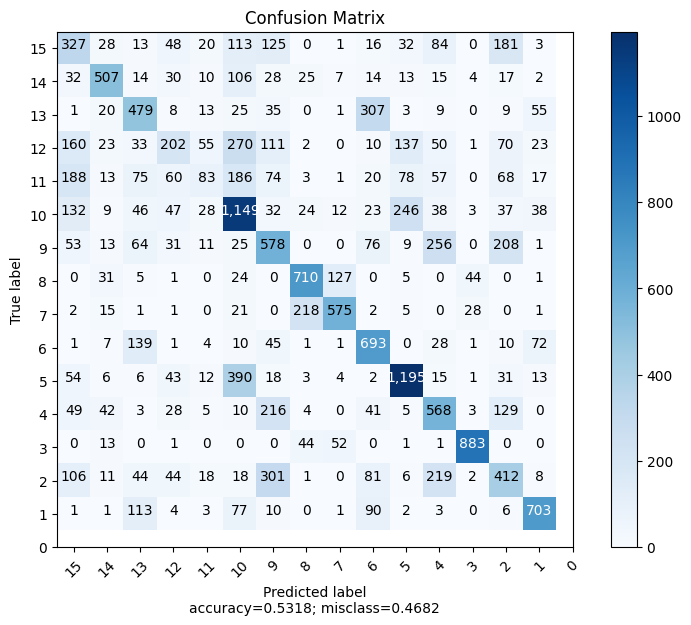

In [58]:
mat4 = confusion_matrix(y_test, y_pred4)
plot_confusion_matrix(cm           = mat4, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred5 = clf.predict(x_test)

C:\Users\kp18f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
clf.score(x_test, y_test)

0.3055441478439425

In [61]:
accuracy_score(y_test, y_pred5)

0.3055441478439425

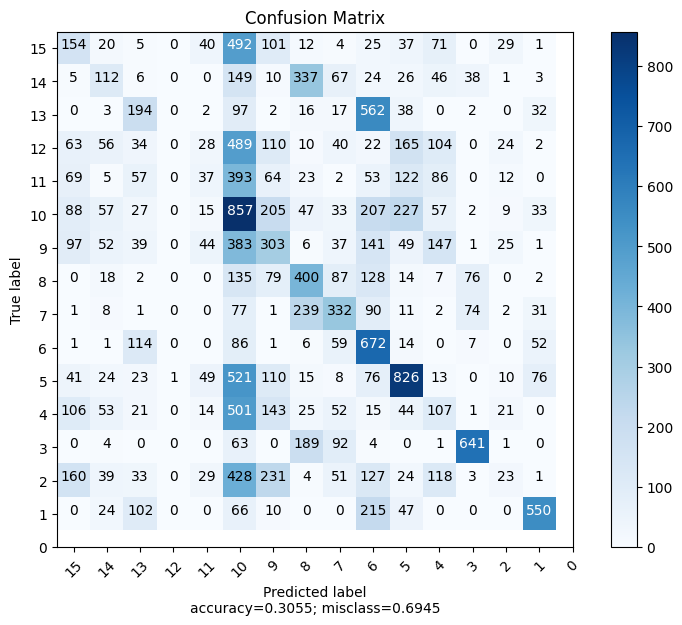

In [62]:
mat5 = confusion_matrix(y_test, y_pred5)
plot_confusion_matrix(cm           = mat5, 
                      normalize    = False,
                      target_names = ['15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'],
                      title        = "Confusion Matrix")

## Visualization

In [63]:
accuracy_score_y = [accuracy_score(y_test, y_pred1)*100, accuracy_score(y_test, y_pred2)*100, accuracy_score(y_test, y_pred3)*100, accuracy_score(y_test, y_pred4)*100, accuracy_score(y_test, y_pred5)*100]
f1_score_y = [
    f1_score(y_test, y_pred1, average='macro') * 100,
    f1_score(y_test, y_pred2, average='macro') * 100,
    f1_score(y_test, y_pred3, average='macro') * 100,
    f1_score(y_test, y_pred4, average='macro') * 100,
    f1_score(y_test, y_pred5, average='macro') * 100
]
recall_score_y = [
    recall_score(y_test, y_pred1, average='macro') * 100,
    recall_score(y_test, y_pred2, average='macro') * 100,
    recall_score(y_test, y_pred3, average='macro') * 100,
    recall_score(y_test, y_pred4, average='macro') * 100,
    recall_score(y_test, y_pred5, average='macro') * 100
]

In [64]:
x_labels = [ 'RF', 'SGD', 'KNN', 'XGB','LR']
#LR-Logistic Regression RF-Random Forest GB-Gradient Boosting SVM-Support Vector Machines NB-Naive Bayes

<function matplotlib.pyplot.show(close=None, block=None)>

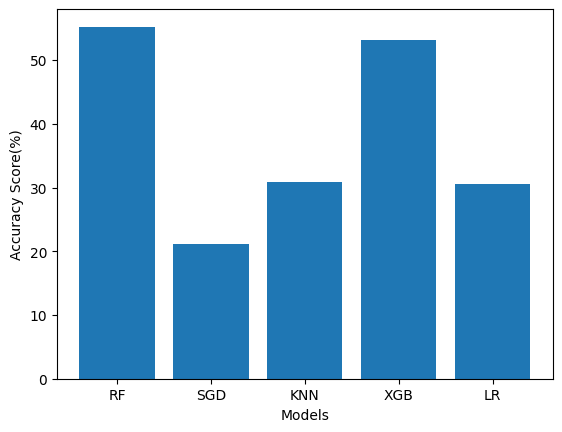

In [65]:
plt.ylabel('Accuracy Score(%)')
plt.xlabel('Models')
plt.bar(x_labels,accuracy_score_y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

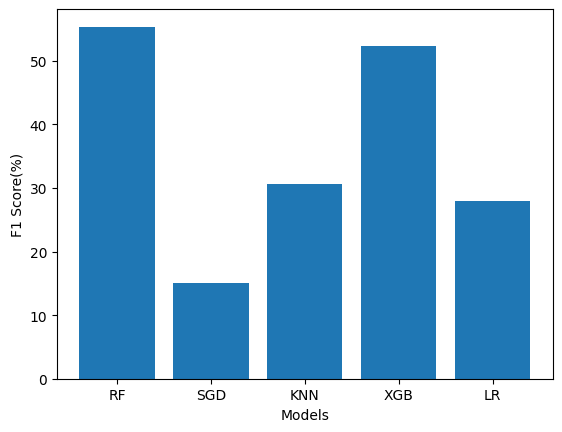

In [66]:
plt.ylabel('F1 Score(%)')
plt.xlabel('Models')
plt.bar(x_labels,f1_score_y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

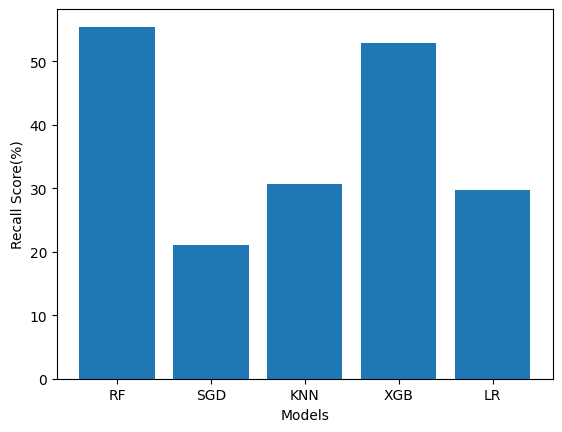

In [67]:
plt.ylabel('Recall Score(%)')
plt.xlabel('Models')
plt.bar(x_labels,recall_score_y)
plt.show

In [68]:
x_train.shape, y_train.shape

((68180, 5), (68180,))

In [69]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
one = OneHotEncoder()

In [70]:
# ... existing code ...
# Reshape y_train and y_test to be 2D
ytrainkeras = one.fit_transform(y_train.values.reshape(-1, 1))  # Reshape to 2D
ytestkeras = one.transform(y_test.values.reshape(-1, 1))  # Reshape to 2D
# ... existing code ...

In [71]:
ytrainkeras

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 68180 stored elements and shape (68180, 15)>

In [72]:
y_test

22139    10
51744     7
40432    14
74625     8
33729    13
         ..
16194     4
37106     8
63453     1
53525    11
57317     1
Name: Crop, Length: 17045, dtype: int32

In [73]:
# ... existing code ...
# Reshape y_train and y_test to be 2D
ytrainkeras = one.fit_transform(y_train.values.reshape(-1, 1))  # Reshape to 2D
ytestkeras = one.transform(y_test.values.reshape(-1, 1))  # Reshape to 2D
# ... existing code ...

In [74]:
ytrainkeras.shape, ytestkeras.shape

((68180, 15), (17045, 15))

In [75]:
model = Sequential()
model.add(Dense(2048, input_dim = x_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1024, input_dim = 6, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(15, activation='relu'))

C:\Users\kp18f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# ... existing code ...
# Reshape y_train and y_test to be 2D and convert to dense format
ytrainkeras = one.fit_transform(y_train.values.reshape(-1, 1)).toarray()  # Convert to dense
ytestkeras = one.transform(y_test.values.reshape(-1, 1)).toarray()  # Convert to dense
# ... existing code ...

# Compile and fit the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, ytrainkeras, epochs=100, batch_size=10000)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 0.2084 - loss: 2.4097
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 532ms/step - accuracy: 0.2229 - loss: 2.3217
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 534ms/step - accuracy: 0.2216 - loss: 2.3153
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.2277 - loss: 2.3046
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.2272 - loss: 2.2956
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.2264 - loss: 2.2978
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.2290 - loss: 2.2879
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 0.2321 - loss: 2.2715
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.2317 - loss: 2.2746
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.2306 - loss: 2.2734
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.2283 - loss: 2.2668
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: